In [ ]:
# Copyrights Anil Osman TUR 2017

# COM466 Digital Image Processing Assignment 2
##############################################
### 1. flipImage (image, flag) 
  - Takes image data and a flag argumants
  - flag indicates which way to flip ; horizontal, vertical and both sequentaly 0, 1, 2
  - will return the changed image
  
### 2. inverseImage (image) 
  - on place actually
  - returns inversed image
  - inverse process:
    - if the range of image is [0 - L] and,
    - if X is a gray level of a specific location,
    - new X = L-X
      
### 3. averageIntencity (image)
  - it returns avgerage intencity of the image if the image is chrome it will return array with 3 average
  - operation applied: total intencity / total # of pixels
  
### 4. thresholdImage (image, thresholdValue)
  - it takes image and tresholding value as parameters
  - just the values above that will be in the result image
 
### 5. thresholdWithAvg (image)
  - it just takes image as argument
  - with the help of averageIntencity it will find the average and call the thresholdImage with that averageValue as the threshold value
  
### 6. generateHistogram (image)
  - it will generate histogram of the image
  - if the image is colored it will return 3 histogram array otherwise 1
 
### 7. equalizeHistogram (image)
  - it takes image as argument
  - it will use generateHistogram to find histogram of the image
  - returns histogram equlizedImage
  
## This documnet contains the usages and demos of these functions

In [1]:
%matplotlib inline
%load_ext autoreload
from matplotlib import pyplot as plt
import cv2
import numpy as np
import imagefunctions as IF
%autoreload 2

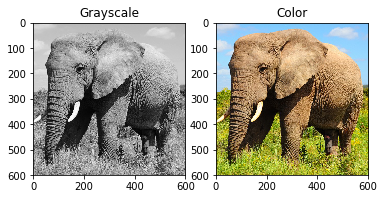

In [2]:
imageGray = cv2.imread("../pics/elephant.jpg", cv2.IMREAD_GRAYSCALE)
imageColor = cv2.imread("../pics/elephant.jpg", cv2.IMREAD_COLOR)

# rgb conversiton is needed for seeing the original colors in matplotlib 
# because opencv reads and conserves it in bgr form not in rgb form
b,g,r = cv2.split(imageColor)
imageColor = cv2.merge((r,g,b))

plt.subplot(1,2,1),plt.imshow(imageGray, "gray"),plt.title('Grayscale')
plt.subplot(1,2,2),plt.imshow(imageColor),plt.title('Color')
plt.show()

## 1. *flipImage* function DEMO

In [3]:
def flipImage(image, flag):
    # lets choose 1 for vertical 0 for horizontal and 2 for both
    if ( flag == 1 ):
        # vertical flip
        new_image = image[:,::-1]
    elif ( flag == 0 ):
        # horizontal flip
        new_image = image[::-1,:]
    elif (flag == 2 ):
        # origin flip
        new_image = image[::-1, ::-1]
        
    return new_image

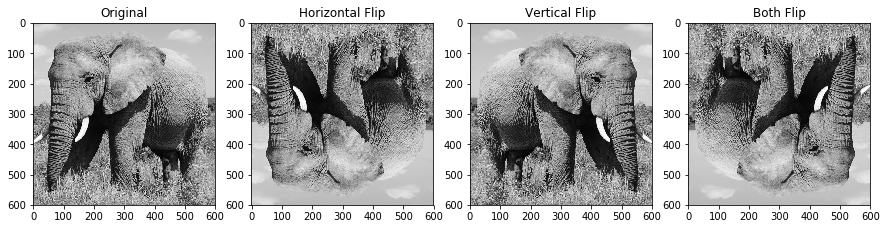

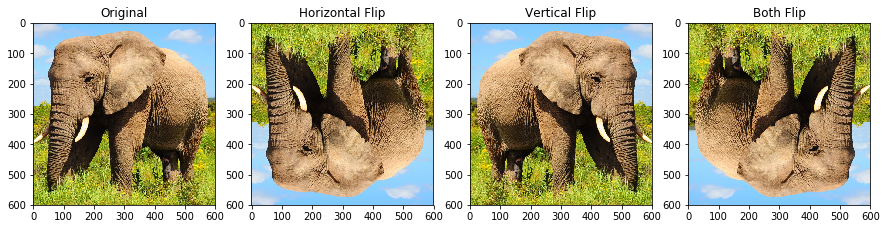

In [4]:
plt.rcParams["figure.figsize"] = 15, 60
# gray sacale
plt.subplot(1,4,1),plt.imshow(imageGray, 'gray'), plt.title('Original')
plt.subplot(1,4,2),plt.imshow(IF.flipImage(imageGray, 0), 'gray'), plt.title('Horizontal Flip')
plt.subplot(1,4,3),plt.imshow(IF.flipImage(imageGray, 1), 'gray'), plt.title('Vertical Flip')
plt.subplot(1,4,4),plt.imshow(IF.flipImage(imageGray, 2), 'gray'), plt.title('Both Flip')
plt.show()

# color
plt.subplot(1,4,1),plt.imshow(imageColor), plt.title('Original')
plt.subplot(1,4,2),plt.imshow(IF.flipImage(imageColor, 0)), plt.title('Horizontal Flip')
plt.subplot(1,4,3),plt.imshow(IF.flipImage(imageColor, 1)), plt.title('Vertical Flip')
plt.subplot(1,4,4),plt.imshow(IF.flipImage(imageColor, 2)), plt.title('Both Flip')
plt.show()

## 2. *inverseImage* funtion DEMO

In [5]:
def inverseImage(image):
    w = image.shape[0]
    h = image.shape[1]
    
    for i in xrange(w):
        for j in range(h):
            if not (len(image.shape) == 3):
                image[i,j] = np.uint8(255 - image[i,j])
            else:
                image[i,j][0] = np.uint8(255 - image[i,j][0])
                image[i,j][1] = np.uint8(255 - image[i,j][1])
                image[i,j][2] = np.uint8(255 - image[i,j][2])

    return image

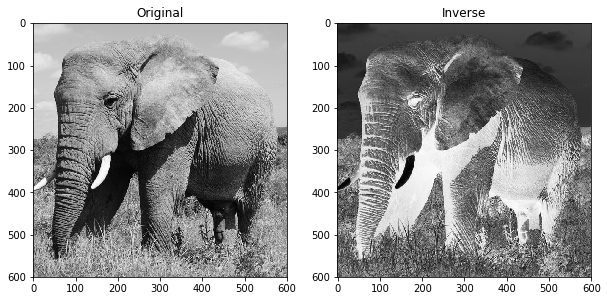

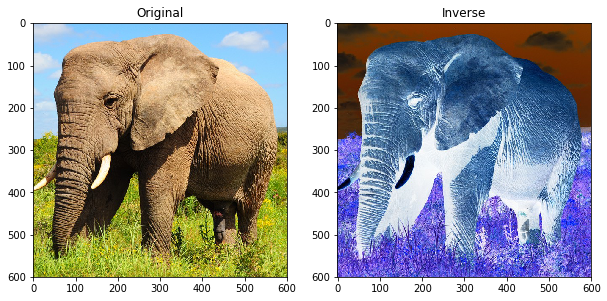

In [6]:
plt.rcParams["figure.figsize"] = 10, 20
# gray sacale
plt.subplot(1,2,1),plt.imshow(imageGray, 'gray'), plt.title('Original')
plt.subplot(1,2,2),plt.imshow(IF.inverseImage(imageGray.copy()), 'gray'), plt.title('Inverse')
plt.show()

# color
plt.subplot(1,2,1),plt.imshow(imageColor), plt.title('Original')
plt.subplot(1,2,2),plt.imshow(IF.inverseImage(imageColor.copy())), plt.title('Inverse')
plt.show()

## 3. *averageIntencity*  funtion DEMO

In [7]:
def avgIntensity(image):
    
    w = image.shape[0]
    h = image.shape[1]
    
    
    if len(image.shape) == 3: # it is colored
        b,g,r = cv2.split(image)
        ciAvg = np.array([np.sum(b),np.sum(g),np.sum(r)]) / (w*h) # color intesity average
        print ("average intensities: ", ciAvg)
        return ciAvg
    else:
        iAvg = int( np.sum(image) / (w*h) )
        print ("average intensity: ", iAvg)
        return iAvg
    
    return -1 # if haven't returned yet there is a problem

In [8]:
print (IF.avgIntensity(imageGray))
print (IF.avgIntensity(imageColor))

average intensity:  136
136
average intensities:  [146.91553056 138.9874      96.61426111]
[146.91553056 138.9874      96.61426111]


## 4. *thresholdImage* funtion DEMO

In [9]:
def thresholdImg(image, threshold):
    if len(image.shape) == 3: # it is colored
        colors = cv2.split(image)
        if not isinstance(threshold, int):
            if len(threshold) == 3:
                for i in xrange(3):
                    colors[i] = np.uint8(255) * (colors[i] > threshold[i])
            else:
                print ("3 parameter needed to apply treshold with different values")
        else:
            for i in xrange(3):
                colors[i] = np.uint8(255) * (colors[i] > threshold)
        return cv2.merge(colors)
    else:
        
        return 255 * ( image > threshold )
    
    return -1  # if haven't returned yet there is a problem

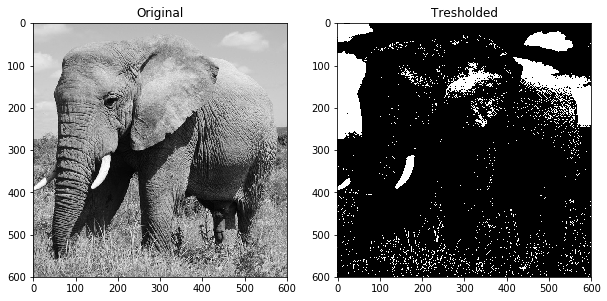

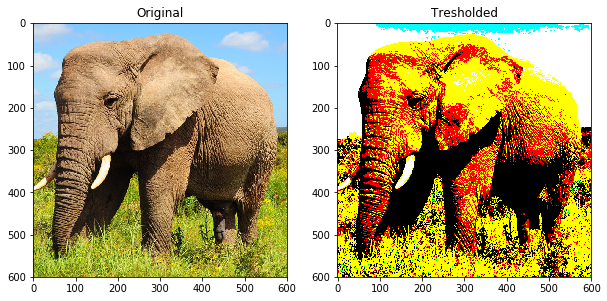

In [10]:
threshold = 200

plt.rcParams["figure.figsize"] = 10, 30
# gray sacale
plt.subplot(1,2,1),plt.imshow(imageGray, 'gray'), plt.title('Original')
plt.subplot(1,2,2),plt.imshow(IF.thresholdImg(imageGray, threshold), 'gray'), plt.title('Tresholded')
plt.show()


threshold = [130, 150, 170]
# color
plt.subplot(1,2,1),plt.imshow(imageColor), plt.title('Original')
plt.subplot(1,2,2),plt.imshow(IF.thresholdImg(imageColor, threshold)), plt.title('Tresholded')
plt.show()

## 5. *thresholdWithAvg* funtion DEMO

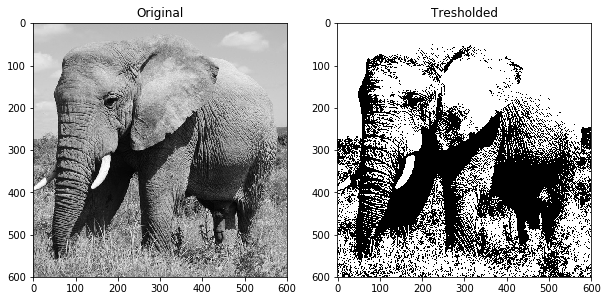

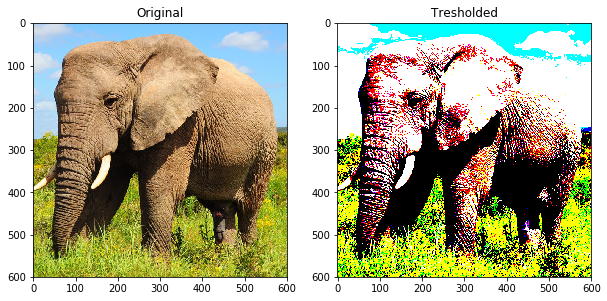

In [26]:
plt.rcParams["figure.figsize"] = 10, 20
# gray sacale
plt.subplot(1,2,1),plt.imshow(imageGray, 'gray'), plt.title('Original')
plt.subplot(1,2,2),plt.imshow(IF.tresholdWithAvg(imageGray), 'gray'), plt.title('Tresholded')
plt.show()

# color
plt.subplot(1,2,1),plt.imshow(imageColor), plt.title('Original')
plt.subplot(1,2,2),plt.imshow(IF.tresholdWithAvg(imageColor)), plt.title('Tresholded')
plt.show()

# histogram part

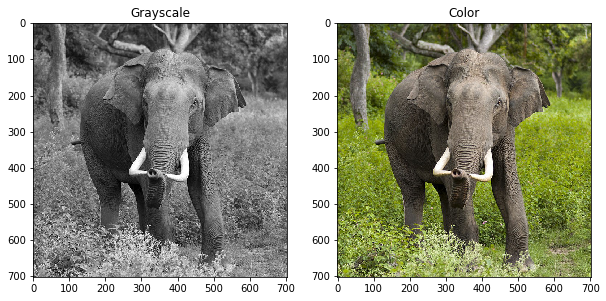

In [28]:
# for seeing better result another picture
imageGray = cv2.imread("../pics/elephant2.jpg", cv2.IMREAD_GRAYSCALE)
imageColor = cv2.imread("../pics/elephant2.jpg", cv2.IMREAD_COLOR)

# rgb conversiton is needed for seeing the original colors in matplotlib 
# because opencv reads and conserves it in bgr form not in rgb form
b,g,r = cv2.split(imageColor)
imageColor = cv2.merge((r,g,b))

plt.subplot(1,2,1),plt.imshow(imageGray, "gray"),plt.title('Grayscale')
plt.subplot(1,2,2),plt.imshow(imageColor),plt.title('Color')
plt.show()

## 6. *generateHistogram* funtion DEMO

In [44]:
# histogram helper function to draw
def plotHistogram(histData):
    plt.close('all')
    plt.rcParams["figure.figsize"] = [20, 3]
    width = 3
    x = np.arange(256)
    if len(histData) == 3:
        plt.bar(x, histData[0], width/3, color='b')
        plt.bar(x, histData[1], width/3, color='g')
        plt.bar(x, histData[2], width/3, color='r')
        plt.show()
    else:
        plt.bar(x, histData, width/3, color='b')
        plt.show()
    
def plotHistogramSeprate(histData):
    plt.close('all')
    plt.rcParams["figure.figsize"] = [20,10]
    width = 3
    x = np.arange(256)
    if len(histData) == 3:
        plt.close('all')
        plt.subplot(3, 1, 1), plt.bar(x, histog[0], width/3, color='b')
        plt.subplot(3, 1, 2), plt.bar(x, histog[1], width/3, color='g')
        plt.subplot(3, 1, 3), plt.bar(x, histog[2], width/3, color='r')
        plt.show()
    else:
        plt.bar(x, histData, width/3, color='b')
        plt.show()

[ 187.  134.  148.  131.  122.  138.  152.  148.  158.  171.  184.  214.
  217.  277.  337.  372.  494.  620.  646.  707.  786.  846.  996. 1035.
 1073. 1156. 1267. 1264. 1384. 1408. 1395. 1531. 1667. 1635. 1737. 1737.
 1813. 1906. 1894. 1924. 1986. 2042. 2030. 2054. 2155. 2161. 2219. 2272.
 2278. 2363. 2340. 2363. 2316. 2443. 2422. 2483. 2474. 2534. 2533. 2527.
 2586. 2580. 2689. 2612. 2669. 2643. 2683. 2766. 2817. 2717. 2856. 2871.
 2851. 2884. 2921. 2894. 3070. 3013. 2954. 2939. 3055. 3038. 3042. 3059.
 3148. 3204. 3192. 3242. 3215. 3247. 3377. 3388. 3461. 3345. 3513. 3482.
 3452. 3521. 3440. 3483. 3529. 3500. 3530. 3587. 3525. 3682. 3590. 3604.
 3790. 3800. 3918. 3746. 3788. 3920. 3787. 3930. 3854. 3909. 3884. 3915.
 3841. 3876. 4027. 3979. 3955. 3910. 4081. 3948. 3964. 4036. 4024. 3916.
 3958. 3982. 3892. 3839. 3911. 3799. 3930. 3718. 3718. 3788. 3725. 3715.
 3674. 3661. 3435. 3389. 3310. 3331. 3245. 3184. 3220. 3171. 2954. 2890.
 2848. 2834. 2745. 2674. 2562. 2521. 2516. 2424. 22

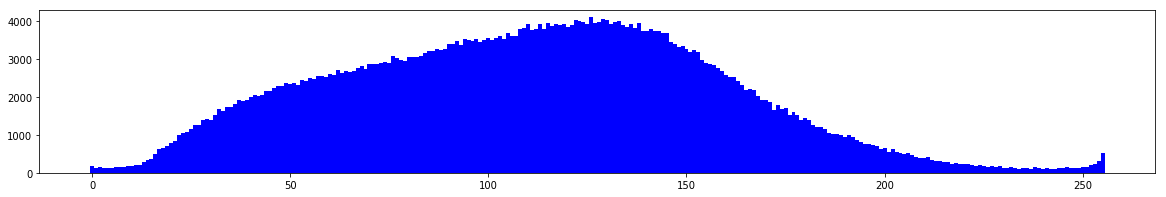

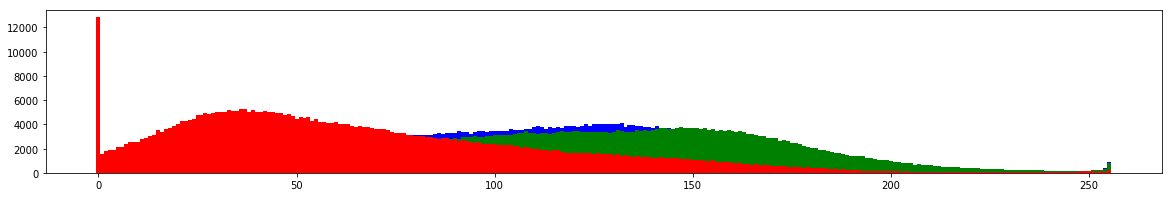

In [45]:
histog = IF.generateHistogram(imageGray)
print (histog)
plotHistogram(histog)

histog = IF.generateHistogram(imageColor)
plotHistogram(histog)

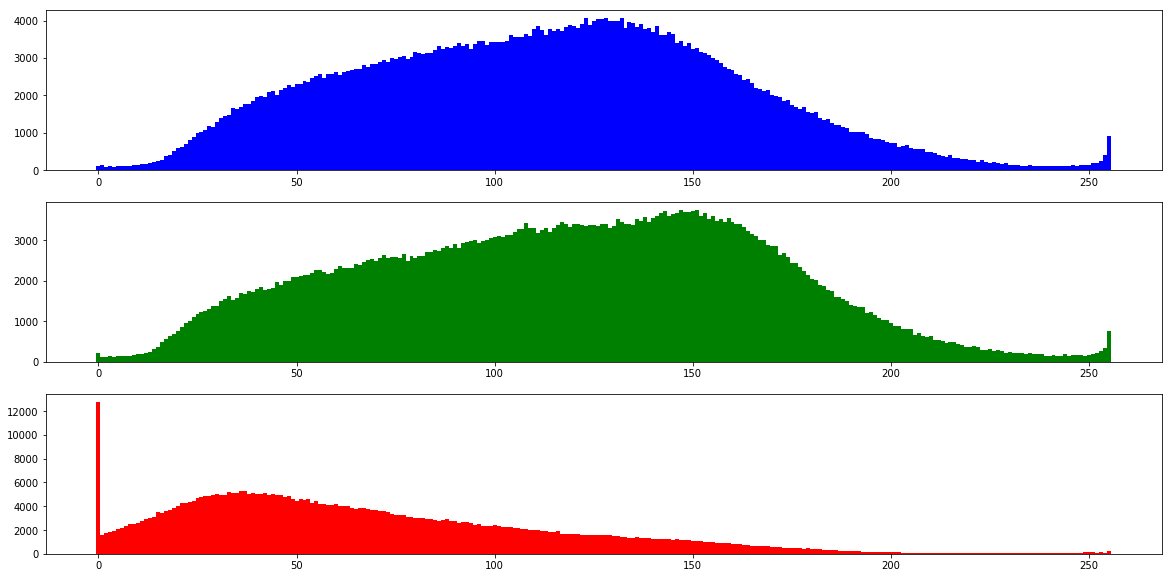

In [46]:
plotHistogramSeprate(histog)

## 7. *equalizeHistogram* funtion DEMO

In [47]:
def equalizeHistogram(image):
    cols = image.shape[0]
    rows = image.shape[1]
    hist = IF.generateHistogram(image)
    if (len(image.shape) == 2 ):
        sample = cols * rows
        histFunc = hist / float(sample)
        plt.plot(histFunc)
        plt.show()
        for i in range(1,hist.size):
            histFunc[i] = histFunc[i-1] + histFunc[i]
        plt.plot(histFunc)
        plt.show()
        new_image = np.zeros(image.shape, dtype=np.uint8)   
        for i in range(cols):
            for j in range(rows):
                new_image[i,j] = np.uint8( round(histFunc[image[i,j]] * image[i,j]) )
        return new_image
    

In [48]:
def generateHistogram(image):
    
    cols = image.shape[0]
    rows = image.shape[1]
    if (len(image.shape) == 2 ):
        histData = np.zeros(256) # as a range 0 - 255 used
        flatImage = image.flatten()
        for i in range(len(flatImage)):
            histData[flatImage[i]] += 1
        #for i in xrange(cols):
        #    for j in xrange(rows):
        #        histData[image[i,j]] += 1
        return histData
    elif (len(image.shape) == 3):
        b,g,r = cv2.split(image)
        histData = [generateHistogram(b),generateHistogram(g),generateHistogram(r)]
        return histData

    return -1 # if haven't returned yet there is a problem

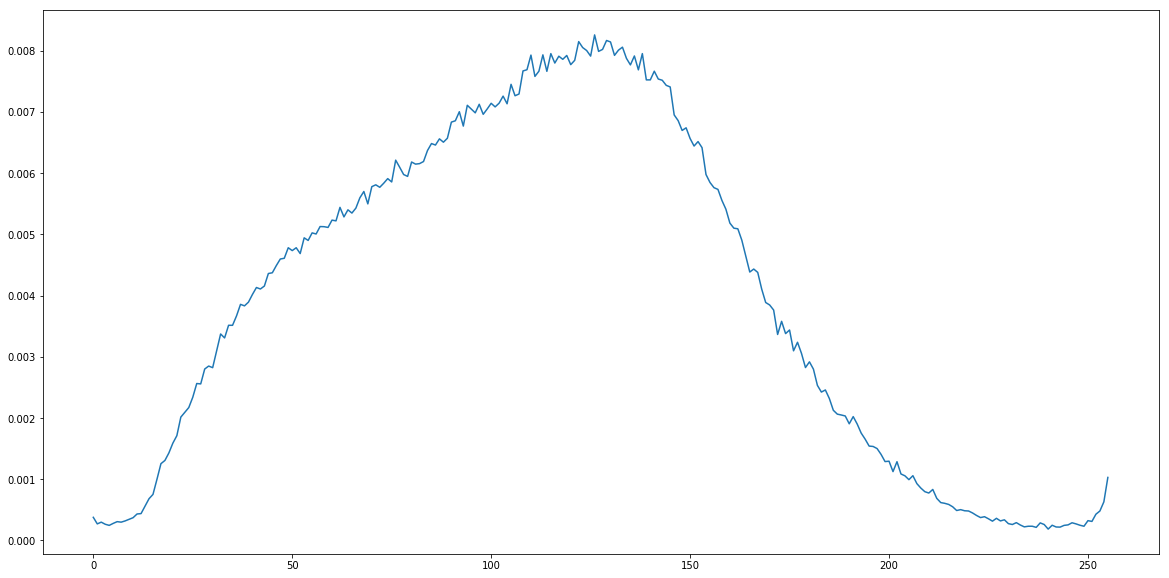

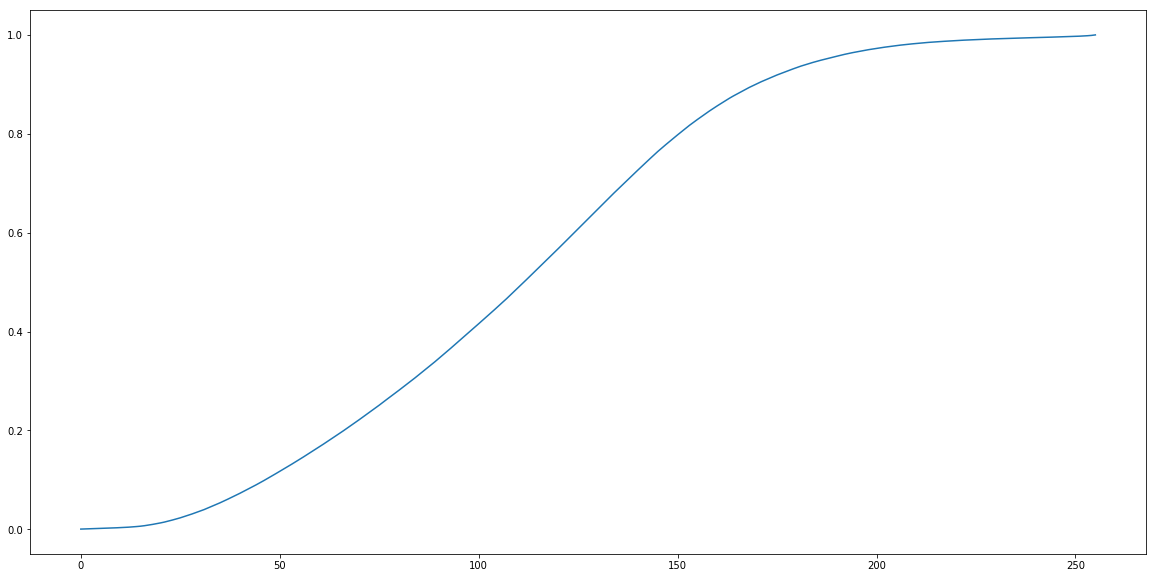

array([[ 17,  20,  20, ...,  91, 109, 120],
       [ 23,  23,  22, ...,  88, 102, 114],
       [ 30,  28,  26, ...,  81,  89, 104],
       ...,
       [ 76,  10,   3, ..., 164, 165, 186],
       [ 29,   2,   3, ..., 158, 147, 127],
       [ 12,   4,  11, ..., 180, 164,  93]], dtype=uint8)

In [49]:
equalizeHistogram(imageGray)

(703, 703)


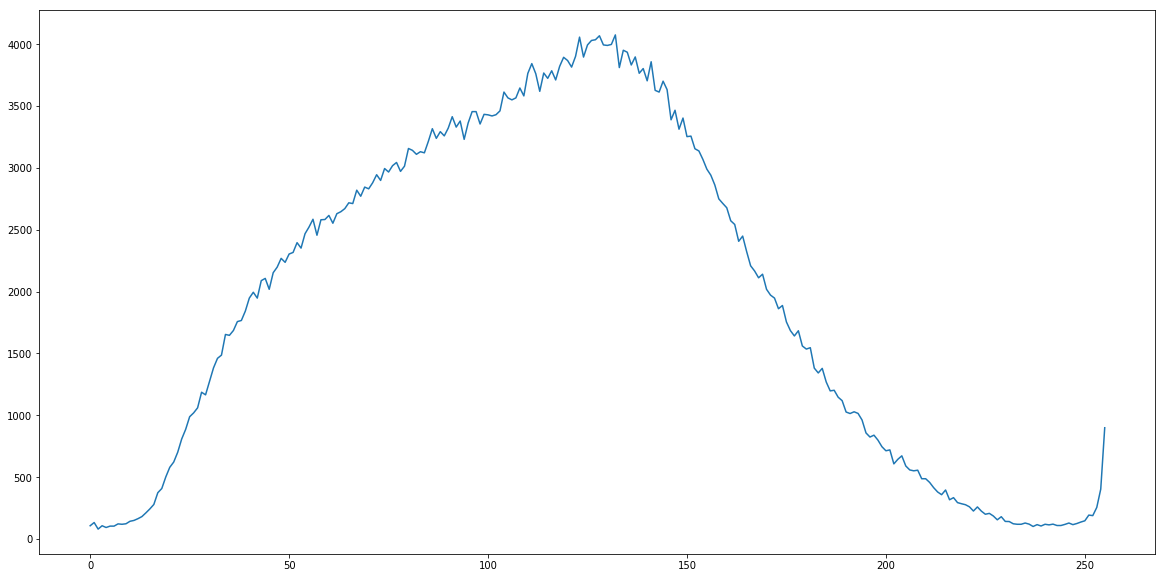

In [51]:
h = histog[0]
print (imageGray.shape)
x = np.arange(256)
plt.plot(x,h)
plt.show()

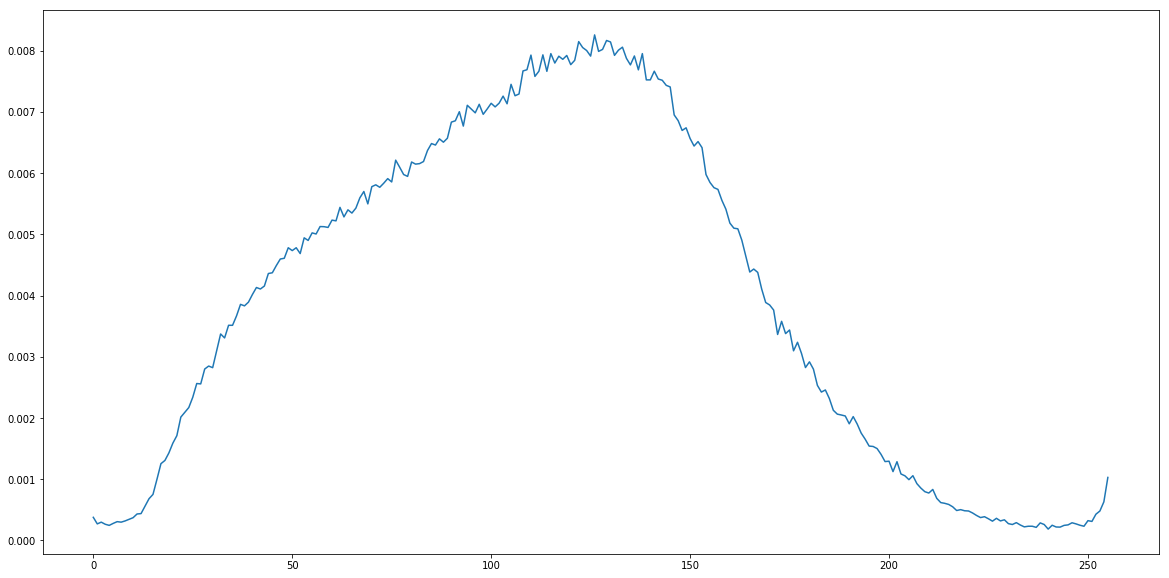

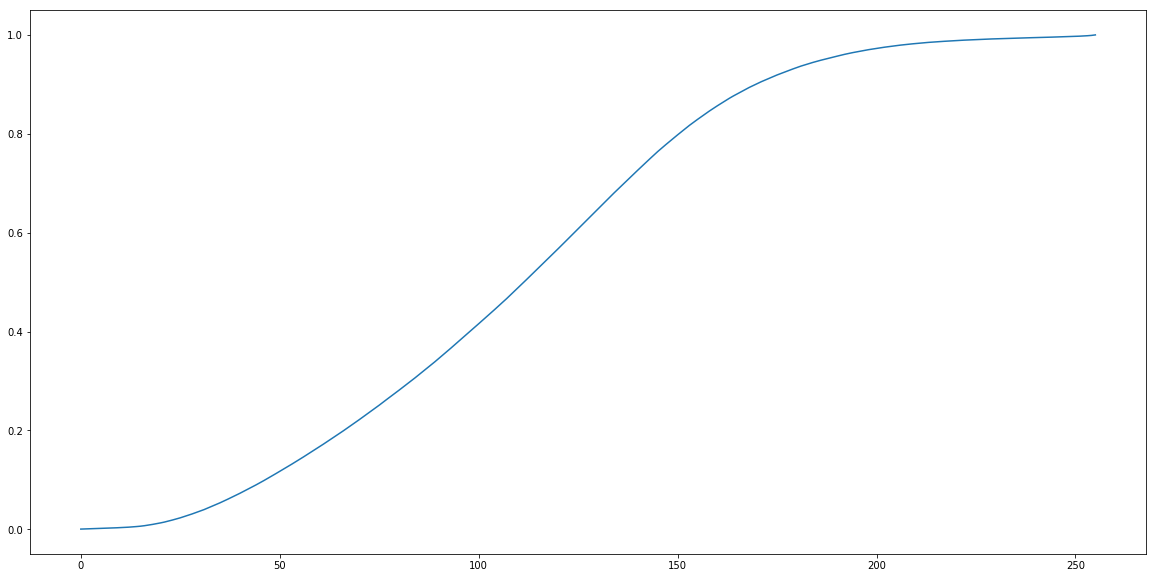

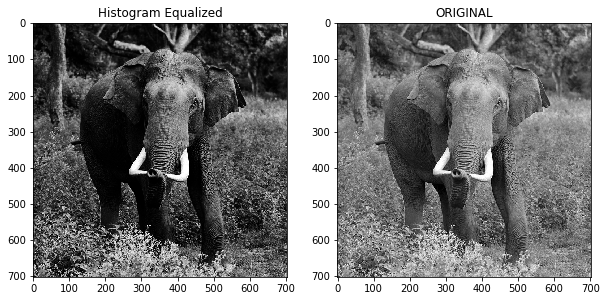

[10293. 11072. 10722.  7982.  6370.  6769.  7066.  7181.  4957.  5067.
  5113.  5269.  5281.  5326.  5583.  2717.  5727.  5735.  2921.  2894.
  6083.  2954.  2939.  6093.  3042.  3059.  3148.  6396.  3242.  3215.
  3247.  3377.  3388.  3461.  3345.  3513.  3482.  3452.  3521.  3440.
  3483.     0.  3529.  3500.  3530.  3587.  3525.  3682.     0.  3590.
  3604.  3790.     0.  3800.  3918.  3746.     0.  3788.  3920.  3787.
     0.  3930.  3854.     0.  3909.  3884.     0.  3915.  3841.     0.
  3876.  4027.     0.  3979.  3955.     0.  3910.     0.  4081.  3948.
     0.  3964.     0.  4036.  4024.     0.  3916.     0.  3958.  3982.
     0.  3892.     0.  3839.     0.  3911.  3799.     0.  3930.     0.
  3718.     0.  3718.     0.  3788.  3725.     0.  3715.     0.  3674.
     0.  3661.     0.  3435.  3389.     0.  3310.     0.  3331.     0.
  3245.  3184.     0.  3220.     0.  3171.     0.  2954.  2890.     0.
  2848.     0.  2834.     0.  2745.  2674.     0.  2562.     0.  2521.
  2516

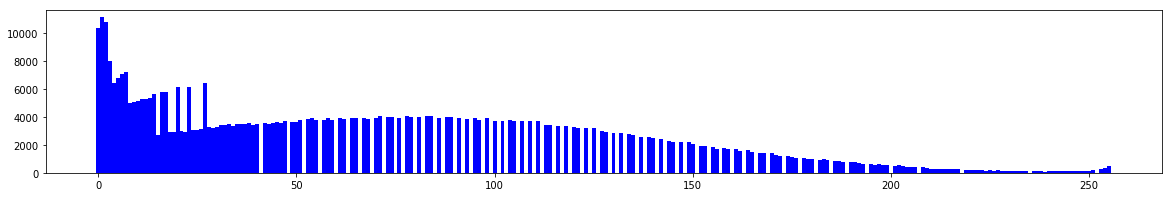

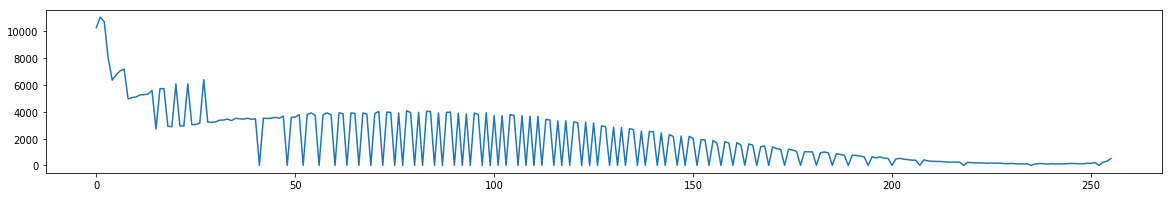

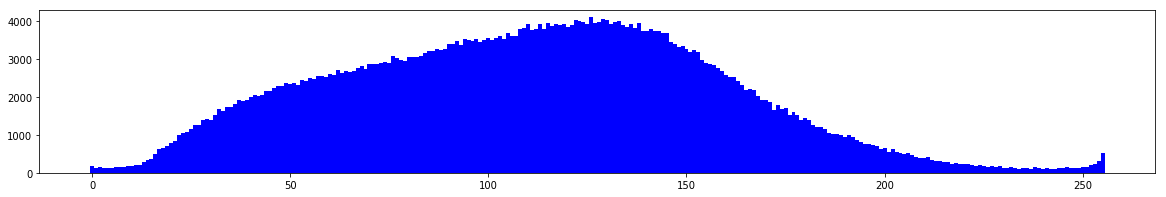

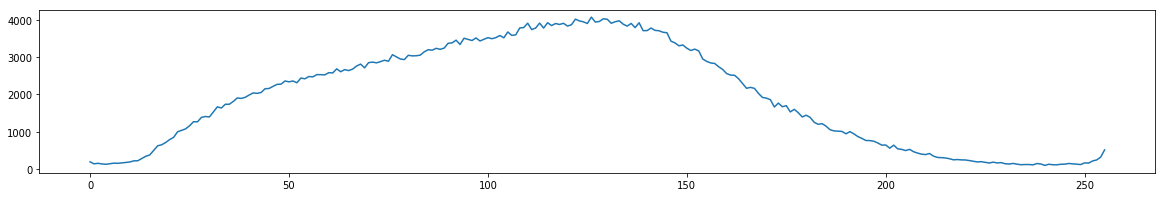

In [52]:
n_imageGray = equalizeHistogram(imageGray)

plt.rcParams["figure.figsize"] = [10, 8]
plt.subplot(121),plt.imshow(n_imageGray, cmap='gray'),plt.title('Histogram Equalized')
plt.subplot(122),plt.imshow(imageGray, cmap='gray'),plt.title('ORIGINAL')
plt.show()

histog = IF.generateHistogram(n_imageGray)
print (histog)
plotHistogram(histog)
x = np.arange(256)
plt.plot(x,histog)
plt.show()

histog = IF.generateHistogram(imageGray)
plotHistogram(histog)
x = np.arange(256)
plt.plot(x,histog)
plt.show()

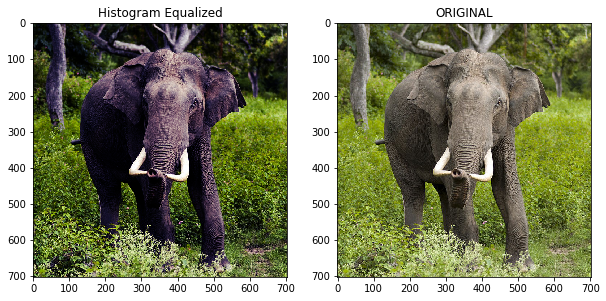

In [55]:
n_imageColor = IF.equalizeHistogram(imageColor)

plt.rcParams["figure.figsize"] = [10, 8]
plt.subplot(121),plt.imshow(n_imageColor),plt.title('Histogram Equalized')
plt.subplot(122),plt.imshow(imageColor),plt.title('ORIGINAL')
plt.show()

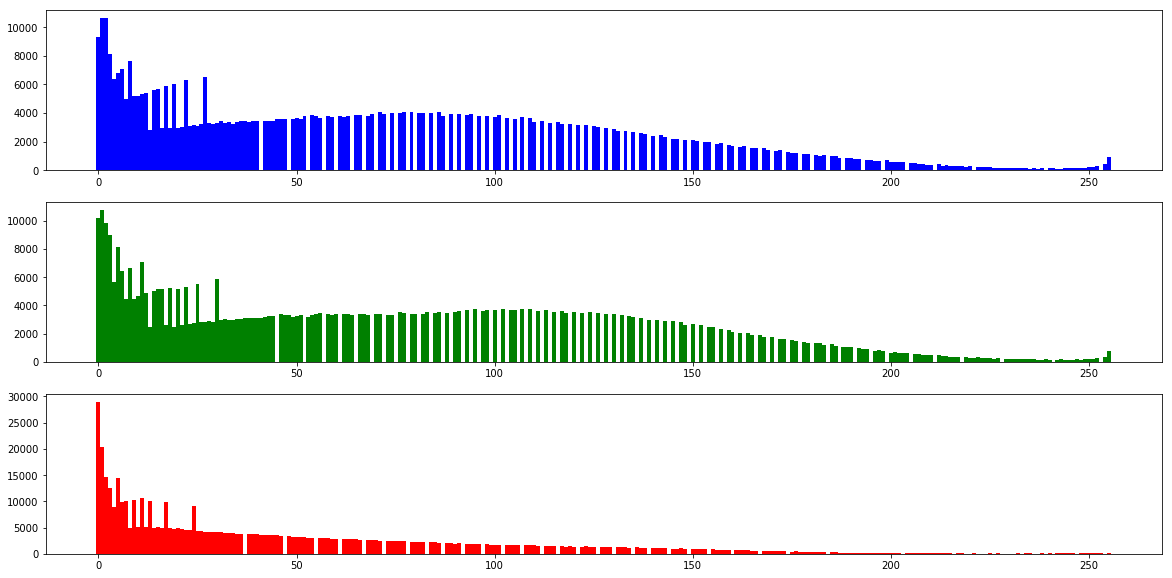

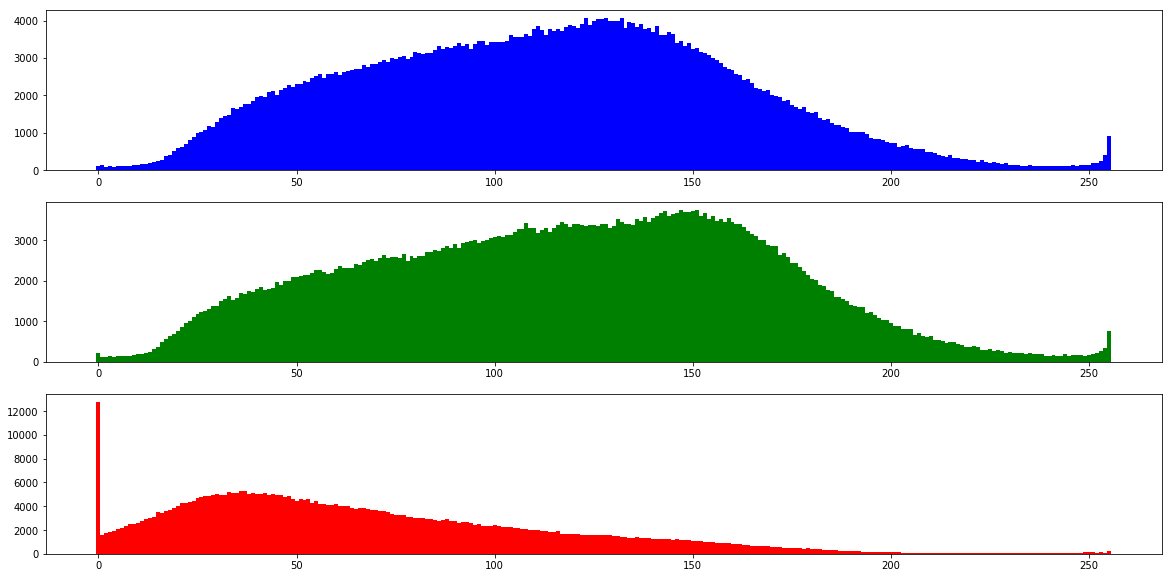

In [56]:
histog = IF.generateHistogram(n_imageColor)
plotHistogramSeprate(histog)

histog = IF.generateHistogram(imageColor)
plotHistogramSeprate(histog)